## 신경망과 딥러닝
# Tensorflow 2.x

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 텐서플로 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.4.0'

### 상수 정의

In [3]:
a = tf.constant([1,2,3])
a

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [4]:
a.numpy()

array([1, 2, 3])

In [6]:
a = tf.constant(np.zeros([3,3]))
a

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])>

In [7]:
a = tf.convert_to_tensor(np.random.randn(3,3))
a

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[ 0.29403328,  0.92638787,  0.30121074],
       [-0.64687118, -0.87361732,  0.03403373],
       [ 1.0845237 , -0.77463093,  0.77346576]])>

In [10]:
a = tf.random.normal([3,3], 10, 1)
a

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[10.478706 ,  9.417757 , 10.1420145],
       [10.11939  ,  9.785744 , 10.049445 ],
       [ 9.955601 , 10.922347 ,  9.859149 ]], dtype=float32)>

### 변수 정의

In [11]:
x = tf.Variable([1,2,3])
x

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3])>

In [12]:
x = tf.Variable([1., 2, 3])
x

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [13]:
x.assign([10,11,12])
x

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([10., 11., 12.], dtype=float32)>

In [14]:
x.assign_add([0.1, 0.2, 0.3])
x

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([10.1, 11.2, 12.3], dtype=float32)>

In [15]:
x.assign_sub([1,2,3])
x

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([9.1, 9.2, 9.3], dtype=float32)>

### 기울기 계산 (미분)
- tf.GradientTape()

In [16]:
x = tf.Variable(1.0)

with tf.GradientTape() as tape:
    y = x**2
    
grads = tape.gradient(y, x)
grads

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [17]:
x = tf.constant(1.0)

with tf.GradientTape() as tape:
    tape.watch(x) # x 가 상수인 경우
    y = x**2
    
grads = tape.gradient(y, x)
grads

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [21]:
x1 = tf.Variable(1.0)
x2 = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
    y = x1 + x2 + x1*x2
    
grads1 = tape.gradient(y, x1)
grads2 = tape.gradient(y, x2)

del tape # 명시적 제거

display(grads1, grads2)

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [22]:
x = tf.Variable(1.0)

with tf.GradientTape(persistent=True) as tape:
    y = x**2
    z = x*y
    
grads1 = tape.gradient(y, x)
grads2 = tape.gradient(z, x)
grads3 = tape.gradient(z, y)

del tape

display(grads1, grads2, grads3)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

### 활성화 함수

In [30]:
tf.nn.sigmoid(3.0) # 실수값(tf.float32) 만 가능

<tf.Tensor: shape=(), dtype=float32, numpy=0.95257413>

In [31]:
a = np.arange(-5,6, dtype=np.float32)
tf.nn.sigmoid(a)

<tf.Tensor: shape=(11,), dtype=float32, numpy=
array([0.00669286, 0.01798624, 0.04742587, 0.11920291, 0.26894143,
       0.5       , 0.7310586 , 0.8807971 , 0.95257413, 0.98201376,
       0.9933071 ], dtype=float32)>

In [32]:
tf.nn.relu([-1.0, 0, 1, 2])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 1., 2.], dtype=float32)>

In [33]:
tf.nn.softmax([1.0, 2.0, 3])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>

In [34]:
tf.nn.tanh([-2.0, -1, 0, 1, 2])

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.9640276, -0.7615942,  0.       ,  0.7615942,  0.9640276],
      dtype=float32)>

### 수학함수

In [35]:
tf.math.sqrt(2.0)

<tf.Tensor: shape=(), dtype=float32, numpy=1.4142135>

In [36]:
tf.math.argmax([3.0, 2, 1, 4, 2])

<tf.Tensor: shape=(), dtype=int64, numpy=3>

### 경사하강법 적용 (iris)

In [6]:
iris = np.loadtxt('iris.csv', skiprows=1, delimiter=',', usecols=[0,1,2,3])
iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
X = iris[:, :3]
y = iris[:,[3]]

X.shape, y.shape

((150, 3), (150, 1))

99 0.4017698


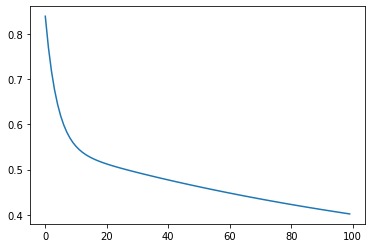

199 0.32788327


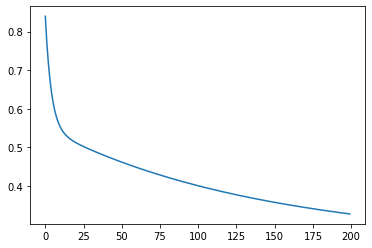

299 0.2900925


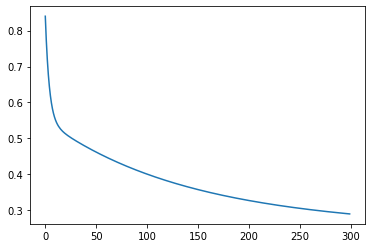

399 0.2694311


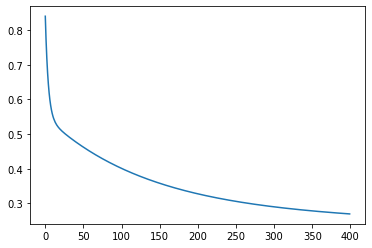

499 0.25693312


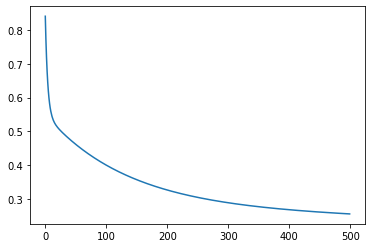

599 0.24835935


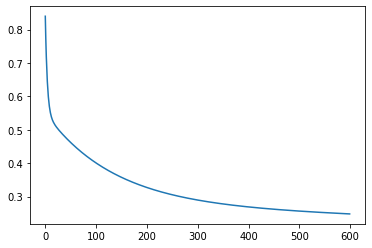

699 0.24170455


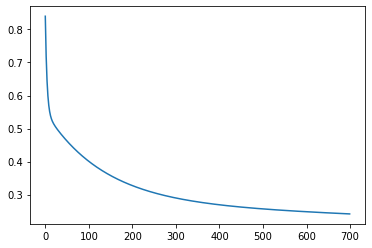

799 0.23601954


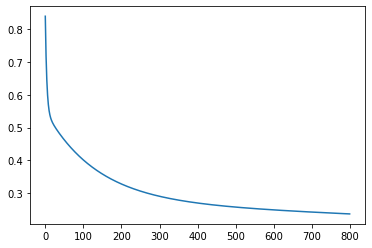

899 0.2308539


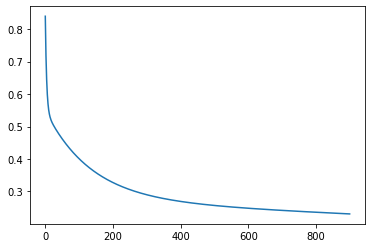

999 0.2259936


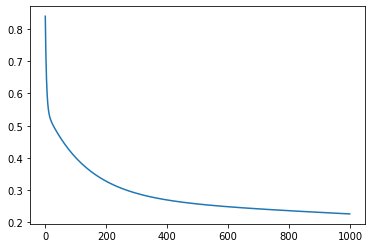

In [10]:
W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(0.0)

lr = 0.001
losses = []

for epoch in range(1000):
    with tf.GradientTape() as tape:
        pred_y = X@W + b
        loss = tf.reduce_sum((y - pred_y)**2)/len(y)
    
    grads = tape.gradient(loss, [W,b])
    W.assign_sub(lr*grads[0])
    b.assign_sub(lr*grads[1])
    
    losses.append(loss.numpy())
    
    if (epoch+1)%100==0:
        print(epoch, loss.numpy())
        plt.figure()
        plt.plot(losses)
        plt.show()

In [93]:
W, b

(<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
 array([[-0.28748938],
        [ 0.36621726],
        [ 0.53286207]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.23104817>)

In [94]:
pred_y2 = X[:10]@W + b
pred_y2

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.33052337],
       [0.20491254],
       [0.28236765],
       [0.38106728],
       [0.39589393],
       [0.55062205],
       [0.43764627],
       [0.37593663],
       [0.31203544],
       [0.29482043]], dtype=float32)>

In [95]:
y[:10]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1]])

### 경사하강법 적용 (MNIST)

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

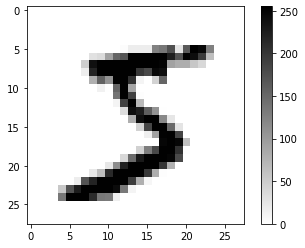

In [39]:
plt.imshow(X_train[0], cmap='gray_r')
plt.colorbar()

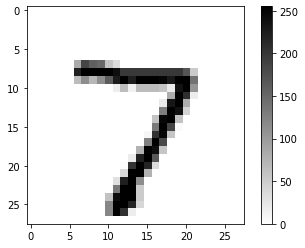

In [40]:
plt.imshow(X_test[0], cmap='gray_r')
plt.colorbar()

In [5]:
# 데이터 전처리
X = X_train.reshape(-1,28*28).astype(np.float32) # 반드시 np.float32
y = np.eye(10, dtype=np.float32)[y_train] # 반드시 np.float32

In [102]:
# 가중치 초기화
W = tf.Variable(tf.random.normal([28*28,10]))
b = tf.Variable(tf.zeros(10))

0 1.6989563
1 1.6984291
2 1.6971991
3 1.6948956
4 1.6942176
5 1.6936755
6 1.6926142
7 1.6918312
8 1.6912133
9 1.690535
10 1.68972
11 1.6888235
12 1.6880273
13 1.6868707
14 1.6860609
15 1.6850986
16 1.6845334
17 1.684371
18 1.6832641
19 1.6823139
20 1.6813086
21 1.6799984
22 1.6794533
23 1.6787488
24 1.6780474
25 1.6776386
26 1.6768461
27 1.6760788
28 1.6751283
29 1.6743464
30 1.6735352
31 1.672868
32 1.6725593
33 1.6717707
34 1.6711544
35 1.6700184
36 1.6689183
37 1.6687943
38 1.6681988
39 1.6677216
40 1.6667396
41 1.6660328
42 1.6651524
43 1.6646156
44 1.6638658
45 1.6630385
46 1.6627971
47 1.6627755
48 1.6616468
49 1.6604553
50 1.6592795
51 1.6584073
52 1.65755
53 1.6563815
54 1.6555396
55 1.6540877
56 1.6532891
57 1.6519997
58 1.6513166
59 1.6507901
60 1.6500281
61 1.6489854
62 1.6481408
63 1.6474953
64 1.6470536
65 1.6459584
66 1.6453731
67 1.6447763
68 1.6443594
69 1.6439071
70 1.6429256
71 1.6422917
72 1.6418985
73 1.6412642
74 1.6408726
75 1.6402354
76 1.6394795
77 1.6388552
78 

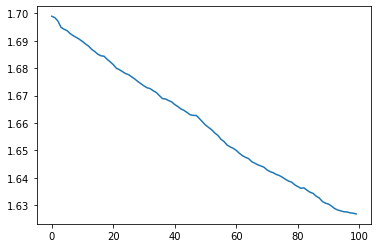

100 1.6256249
101 1.6249667
102 1.6246797
103 1.6238537
104 1.6232544
105 1.6225013
106 1.622337
107 1.6218733
108 1.6215955
109 1.6213022
110 1.6202114
111 1.6193305
112 1.6184723
113 1.6180452
114 1.6175518
115 1.6174481
116 1.6170628
117 1.6169544
118 1.6167579
119 1.616568
120 1.6160457
121 1.6157578
122 1.6157523
123 1.6149673
124 1.614382
125 1.6142125
126 1.6135553
127 1.6132005
128 1.6127343
129 1.6124587
130 1.6121688
131 1.611818
132 1.6116537
133 1.6111653
134 1.6110072
135 1.610706
136 1.6101718
137 1.6096627
138 1.6088045
139 1.6080536
140 1.6078268
141 1.6073453
142 1.6069087
143 1.6060977
144 1.6057386
145 1.6053201
146 1.6049792
147 1.6046255
148 1.6039814
149 1.6035594
150 1.6032401
151 1.6028794
152 1.602793
153 1.6024401
154 1.6020029
155 1.6018354
156 1.6011771
157 1.6010404
158 1.6006867
159 1.6006519
160 1.600247
161 1.6000221
162 1.5999732
163 1.599846
164 1.5995802
165 1.5996375
166 1.5992786
167 1.5991123
168 1.5988405
169 1.5985717
170 1.598332
171 1.5977455
1

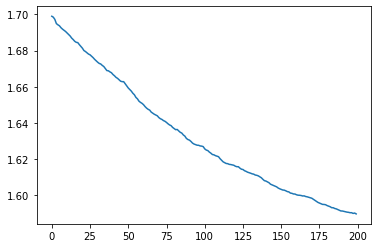

200 1.5892049
201 1.5887493
202 1.588451
203 1.5881641
204 1.587909
205 1.5878721
206 1.5876633
207 1.5876691
208 1.5872414
209 1.5869597
210 1.5869961
211 1.5867593
212 1.5863502
213 1.5860081
214 1.5852377
215 1.5845896
216 1.5841132
217 1.5837305
218 1.5833455
219 1.58305
220 1.5828383
221 1.5826563
222 1.5821667
223 1.5814937
224 1.5810761
225 1.5809132
226 1.5805172
227 1.5805618
228 1.5801173
229 1.5793922
230 1.57898
231 1.5789468
232 1.5784823
233 1.5780896
234 1.5778493
235 1.5776461
236 1.5773678
237 1.5770141
238 1.5767852
239 1.5764834
240 1.5761203
241 1.5755429
242 1.5751305
243 1.5748069
244 1.5745478
245 1.5740511
246 1.573627
247 1.573229
248 1.5729836
249 1.5725989
250 1.5724065
251 1.5720599
252 1.5717899
253 1.5716612
254 1.5714933
255 1.5712972
256 1.5711347
257 1.5709841
258 1.5706329
259 1.5706314
260 1.5704751
261 1.5703585
262 1.5700711
263 1.5699108
264 1.5697016
265 1.5695888
266 1.5692146
267 1.5692565
268 1.5691813
269 1.5689107
270 1.5686469
271 1.5683424


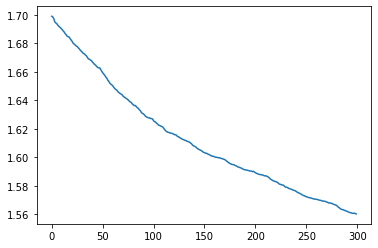

300 1.5602088
301 1.5595514
302 1.5589294
303 1.5588851
304 1.5585955
305 1.5584967
306 1.5582823
307 1.558
308 1.5577557
309 1.5573626
310 1.557099
311 1.5569745
312 1.556724
313 1.5564826
314 1.5562812
315 1.5556446
316 1.5553808
317 1.5552312
318 1.554843
319 1.5544775
320 1.5544107
321 1.5541303
322 1.5535573
323 1.5534215
324 1.5530813
325 1.5529703
326 1.5528
327 1.5525923
328 1.5523422
329 1.552112
330 1.5517768
331 1.5517064
332 1.5514278
333 1.5511216
334 1.5510695
335 1.5509081
336 1.5504576
337 1.5504702
338 1.550306
339 1.5498592
340 1.5496013
341 1.5492495
342 1.5489659
343 1.5486825
344 1.5483533
345 1.5481813
346 1.5477409
347 1.5473018
348 1.5471625
349 1.5468512
350 1.546494
351 1.5458976
352 1.5456659
353 1.545567
354 1.5453917
355 1.5449641
356 1.5446031
357 1.5442197
358 1.5444435
359 1.5441923
360 1.544091
361 1.5441076
362 1.5434417
363 1.543399
364 1.5431567
365 1.5427783
366 1.5426791
367 1.5424207
368 1.5419385
369 1.5415176
370 1.5407344
371 1.5403917
372 1.54

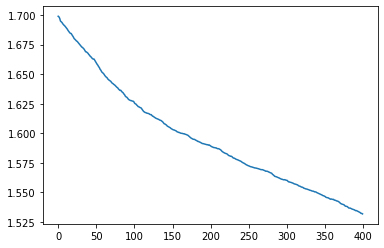

400 1.5316432
401 1.5314288
402 1.5310187
403 1.5308226
404 1.5305777
405 1.5302802
406 1.5301237
407 1.529707
408 1.5293307
409 1.528613
410 1.528425
411 1.5282017
412 1.5278218
413 1.527663
414 1.527501
415 1.5272298
416 1.5268521
417 1.5265325
418 1.526119
419 1.5259182
420 1.5252692
421 1.5253048
422 1.5249048
423 1.5247866
424 1.5244963
425 1.5243826
426 1.5240248
427 1.523488
428 1.5232376
429 1.5229119
430 1.5228906
431 1.5227056
432 1.5223931
433 1.5221014
434 1.5219402
435 1.5212854
436 1.520575
437 1.5203205
438 1.520065
439 1.5200702
440 1.5198874
441 1.519736
442 1.5195088
443 1.5194893
444 1.5193024
445 1.5194168
446 1.5190513
447 1.5188648
448 1.5192598
449 1.5187185
450 1.5185654
451 1.5181262
452 1.5179851
453 1.5179646
454 1.5179276
455 1.5176584
456 1.5176461
457 1.5175
458 1.5168964
459 1.5166411
460 1.515938
461 1.5158263
462 1.5154574
463 1.5150594
464 1.514854
465 1.5143846
466 1.5140377
467 1.5135767
468 1.5134505
469 1.513123
470 1.5128393
471 1.5125884
472 1.51

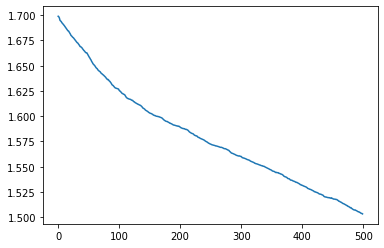

500 1.5027905
501 1.502659
502 1.5025125
503 1.5019766
504 1.5016394
505 1.5013529
506 1.5010486
507 1.5008941
508 1.5007389
509 1.500756
510 1.5004687
511 1.5003251
512 1.5003566
513 1.5001198
514 1.4999938
515 1.4998281
516 1.4996029
517 1.4991889
518 1.4988166
519 1.4985908
520 1.4984288
521 1.4981575
522 1.4978355
523 1.4980079
524 1.4979156
525 1.4976823
526 1.4973226
527 1.4969599
528 1.4964802
529 1.4959667
530 1.4955279
531 1.494792
532 1.494482
533 1.4941772
534 1.4939733
535 1.4936786
536 1.4932038
537 1.4929115
538 1.4926667
539 1.4926128
540 1.492155
541 1.4917122
542 1.4913305
543 1.4913659
544 1.4913001
545 1.4910879
546 1.4911202
547 1.4904562
548 1.4901519
549 1.4898436
550 1.4894687
551 1.4892277
552 1.4889257
553 1.4890221
554 1.4889363
555 1.4886886
556 1.4884812
557 1.4883786
558 1.4882421
559 1.4881816
560 1.487936
561 1.4875987
562 1.4873204
563 1.4870971
564 1.4868013
565 1.4865638
566 1.4866201
567 1.4858869
568 1.4856822
569 1.4856701
570 1.4854621
571 1.485228

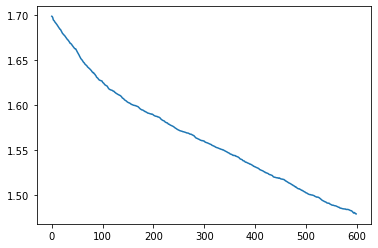

600 1.4787875
601 1.4787948
602 1.4786074
603 1.4780426
604 1.4775461
605 1.4775066
606 1.4773047
607 1.4770848
608 1.4766269
609 1.4760568
610 1.4756739
611 1.4760696
612 1.4754466
613 1.4754496
614 1.4748607
615 1.4748039
616 1.4744841
617 1.4741954
618 1.4740154
619 1.473819
620 1.4736031
621 1.4730637
622 1.472788
623 1.4725817
624 1.4722636
625 1.4719008
626 1.4715409
627 1.4708843
628 1.4705107
629 1.4701881
630 1.4700162
631 1.4695997
632 1.4693474
633 1.4690776
634 1.4692725
635 1.4687132
636 1.4684044
637 1.4686381
638 1.4679799
639 1.4678638
640 1.4679643
641 1.4678223
642 1.4677954
643 1.4674673
644 1.4673971
645 1.4670147
646 1.4667238
647 1.4662967
648 1.4661479
649 1.4658422
650 1.4657995
651 1.4655607
652 1.4652594
653 1.4648006
654 1.4643599
655 1.4641414
656 1.4637924
657 1.4635376
658 1.4633653
659 1.4629612
660 1.4626123
661 1.4621315
662 1.4617727
663 1.4617114
664 1.460868
665 1.4607095
666 1.4601479
667 1.4600067
668 1.4596252
669 1.4594172
670 1.459325
671 1.4590

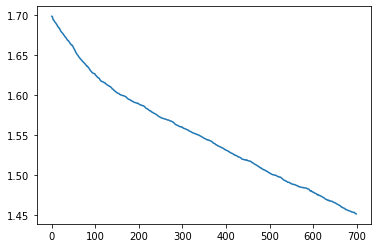

700 1.4512963
701 1.450724
702 1.4505048
703 1.4503092
704 1.4500643
705 1.4497972
706 1.4495677
707 1.44947
708 1.4492636
709 1.4491078
710 1.4486463
711 1.4485806
712 1.4480846
713 1.4478977
714 1.4475166
715 1.447129
716 1.4471221
717 1.4468142
718 1.4466043
719 1.4465115
720 1.4462717
721 1.4461781
722 1.4459416
723 1.4457567
724 1.445393
725 1.4451064
726 1.4448823
727 1.4445732
728 1.4440324
729 1.4441458
730 1.44365
731 1.443495
732 1.4432466
733 1.4430718
734 1.4426956
735 1.4424224
736 1.4419471
737 1.4414192
738 1.4413651
739 1.4411027
740 1.4407833
741 1.4406347
742 1.440176
743 1.4396759
744 1.439272
745 1.4390649
746 1.4387913
747 1.4385265
748 1.4382279
749 1.4380668
750 1.4374869
751 1.4377174
752 1.4373138
753 1.4366946
754 1.4367315
755 1.4359328
756 1.4353334
757 1.4349071
758 1.4344232
759 1.4344544
760 1.4342357
761 1.4340423
762 1.4334751
763 1.4332587
764 1.4329925
765 1.4325398
766 1.4323813
767 1.4321295
768 1.4319576
769 1.4316835
770 1.4316756
771 1.4313588
77

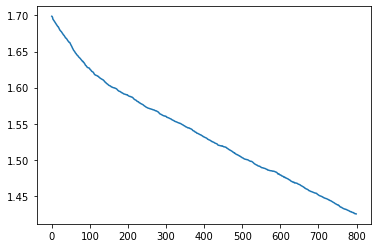

800 1.4250683
801 1.4249505
802 1.4250683
803 1.4249232
804 1.4247445
805 1.4244733
806 1.4243065
807 1.4239136
808 1.4237019
809 1.4236606
810 1.4235868
811 1.4234152
812 1.4233075
813 1.4229928
814 1.4225429
815 1.422234
816 1.422081
817 1.421735
818 1.421534
819 1.4214786
820 1.421028
821 1.420942
822 1.420674
823 1.4206319
824 1.4205335
825 1.4203228
826 1.4203138
827 1.4201661
828 1.419623
829 1.4191414
830 1.4193826
831 1.418993
832 1.4188845
833 1.4183235
834 1.4185125
835 1.4182144
836 1.4179922
837 1.4179308
838 1.4176863
839 1.4172697
840 1.4170012
841 1.4168234
842 1.4168748
843 1.4164791
844 1.4165903
845 1.4162911
846 1.4161706
847 1.4162205
848 1.4160972
849 1.4160066
850 1.415914
851 1.4157959
852 1.41571
853 1.4156677
854 1.4155234
855 1.4152013
856 1.4150969
857 1.4146369
858 1.4142745
859 1.4139506
860 1.4137204
861 1.4137828
862 1.4134052
863 1.4131047
864 1.4131081
865 1.4128026
866 1.4124396
867 1.4119849
868 1.4118257
869 1.4114476
870 1.4113767
871 1.4110229
872 

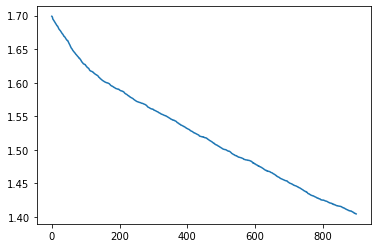

900 1.4040152
901 1.4039586
902 1.4035748
903 1.4033335
904 1.403294
905 1.4030843
906 1.4029672
907 1.4026904
908 1.4024231
909 1.4020494
910 1.4016767
911 1.4014335
912 1.4009768
913 1.4007463
914 1.4001094
915 1.4000472
916 1.399912
917 1.3996993
918 1.3995622
919 1.399394
920 1.3994166
921 1.3994945
922 1.3991399
923 1.3990052
924 1.3987308
925 1.3986171
926 1.3983773
927 1.3983378
928 1.397925
929 1.3976123
930 1.3973258
931 1.3970944
932 1.3971249
933 1.3970172
934 1.3971788
935 1.3967956
936 1.3964592
937 1.3959094
938 1.3957453
939 1.3953341
940 1.3952068
941 1.395053
942 1.3949219
943 1.3946795
944 1.3945345
945 1.3944811
946 1.3943617
947 1.3943417
948 1.3942255
949 1.394001
950 1.3938698
951 1.3937045
952 1.3935424
953 1.3933297
954 1.3933336
955 1.3932457
956 1.3930507
957 1.3930792
958 1.3929904
959 1.3926091
960 1.3923692
961 1.3920379
962 1.3918104
963 1.3918127
964 1.3911997
965 1.3909664
966 1.3906691
967 1.3905349
968 1.3905133
969 1.3905054
970 1.3902706
971 1.390110

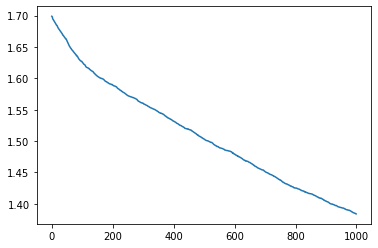

In [103]:
lr = 0.1
losses = []

for epoch in range(1000):
    with tf.GradientTape() as tape:
        pred_y = tf.nn.softmax(X@W + b)
        loss = tf.reduce_sum((y - pred_y)**2)/len(y)
    
    grads = tape.gradient(loss, [W,b])
    W.assign_sub(lr*grads[0])
    b.assign_sub(lr*grads[1])
    
    losses.append(loss.numpy())
    print(epoch, loss.numpy())
    
    if (epoch+1)%100==0:
        plt.figure()
        plt.plot(losses)
        plt.show()

In [104]:
pred_y2 = tf.nn.sigmoid(X@W + b)

(pred_y2.numpy().argmax(axis=1) == y_train).mean()

0.14201666666666668

In [53]:
X2 = X_test.reshape(-1,28*28).astype(np.float32)

pred_y2 = tf.nn.sigmoid(X2@W + b)

(pred_y2.numpy().argmax(axis=1) == y_test).mean()

0.1127

In [10]:
# 가중치 초기화
W = tf.Variable(tf.random.normal([28*28,10]))
b = tf.Variable(tf.zeros(10))

0 33.82073
1 33.696728
2 33.60175
3 33.503822
4 33.39537
5 33.279457
6 33.11058
7 32.99016
8 32.879578
9 32.733784
10 32.586937
11 32.47393
12 32.35392
13 32.196144
14 32.036167
15 31.915892
16 31.77787
17 31.655067
18 31.50291
19 31.374704
20 31.267162
21 31.154325
22 31.04883
23 30.902687
24 30.795382
25 30.690687
26 30.601408
27 30.500397
28 30.373379
29 30.293245
30 30.155684
31 30.041409
32 29.92337
33 29.848446
34 29.742863
35 29.601261
36 29.499203
37 29.385584
38 29.266188
39 29.16778
40 29.033352
41 28.918459
42 28.809298
43 28.696398
44 28.603228
45 28.520817
46 28.445995
47 28.35547
48 28.280796
49 28.194626
50 28.096777
51 28.000065
52 27.939924
53 27.854332
54 27.786564
55 27.740442
56 27.653402
57 27.55372
58 27.47569
59 27.40199
60 27.314734
61 27.222956
62 27.12244
63 27.040176
64 26.95416
65 26.88272
66 26.807775
67 26.723358
68 26.629263
69 26.530886
70 26.417892
71 26.28897
72 26.159594
73 26.043812
74 25.863228
75 25.718483
76 25.59558
77 25.482325
78 25.330482
79 2

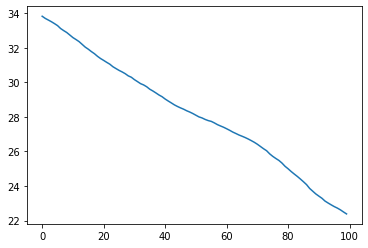

100 22.227787
101 22.09007
102 21.969444
103 21.82918
104 21.701122
105 21.574692
106 21.433842
107 21.293875
108 21.156834
109 21.007063
110 20.878342
111 20.772097
112 20.599674
113 20.494719
114 20.324486
115 20.140858
116 19.990194
117 19.845675
118 19.715563
119 19.583834
120 19.464975
121 19.3312
122 19.194992
123 19.090267
124 18.974787
125 18.852818
126 18.738659
127 18.62538
128 18.509624
129 18.398512
130 18.292337
131 18.206888
132 18.108791
133 18.009058
134 17.90065
135 17.8208
136 17.70649
137 17.599764
138 17.496574
139 17.41209
140 17.327314
141 17.2621
142 17.175161
143 17.068499
144 16.982668
145 16.884672
146 16.796892
147 16.720856
148 16.643076
149 16.584028
150 16.509075
151 16.42313
152 16.357199
153 16.283016
154 16.219992
155 16.147633
156 16.097471
157 16.05086
158 15.994804
159 15.938798
160 15.892134
161 15.842844
162 15.803815
163 15.745146
164 15.679367
165 15.638517
166 15.594477
167 15.539988
168 15.503255
169 15.45335
170 15.403358
171 15.364494
172 15.

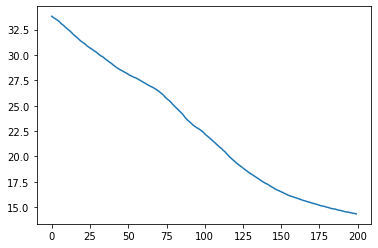

200 14.29576
201 14.268395
202 14.249834
203 14.239494
204 14.196132
205 14.166446
206 14.141237
207 14.112712
208 14.079667
209 14.056419
210 14.023543
211 14.006003
212 13.987242
213 13.96922
214 13.955816
215 13.910672
216 13.904213
217 13.883554
218 13.862002
219 13.830642
220 13.803606
221 13.779429
222 13.765271
223 13.7378645
224 13.712323
225 13.675119
226 13.658963
227 13.64021
228 13.621075
229 13.595365
230 13.5764475
231 13.5621605
232 13.5291605
233 13.517171
234 13.498343
235 13.481563
236 13.46544
237 13.4450035
238 13.44445
239 13.41007
240 13.388919
241 13.365986
242 13.367267
243 13.345096
244 13.322981
245 13.302073
246 13.289864
247 13.290717
248 13.251119
249 13.235425
250 13.216534
251 13.1986
252 13.191125
253 13.191967
254 13.178855
255 13.141211
256 13.127784
257 13.112325
258 13.084633
259 13.081082
260 13.051819
261 13.031763
262 13.024913
263 13.007793
264 13.00212
265 12.985889
266 12.962304
267 12.952458
268 12.953765
269 12.930041
270 12.915831
271 12.895

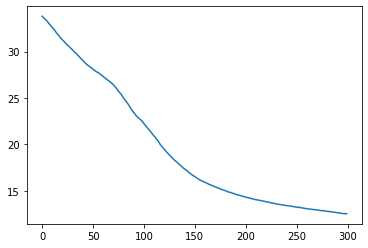

300 12.480108
301 12.477383
302 12.470722
303 12.463115
304 12.443012
305 12.444243
306 12.433967
307 12.410466
308 12.386135
309 12.379419
310 12.365224
311 12.371171
312 12.365402
313 12.339976
314 12.337246
315 12.328273
316 12.322038
317 12.317458
318 12.295837
319 12.27493
320 12.2525215
321 12.239414
322 12.233876
323 12.21826
324 12.219626
325 12.209669
326 12.212568
327 12.18864
328 12.174903
329 12.175318
330 12.185298
331 12.16224
332 12.155485
333 12.145229
334 12.159577
335 12.118442
336 12.116578
337 12.111812
338 12.117541
339 12.096401
340 12.086162
341 12.075246
342 12.088504
343 12.057589
344 12.040623
345 12.051248
346 12.027228
347 12.040781
348 12.006256
349 12.013175
350 12.013072
351 11.987653
352 11.973963
353 11.987548
354 11.977977
355 11.972194
356 11.980617
357 11.954634
358 11.978288
359 11.957178
360 11.933181
361 11.921482
362 11.922992
363 11.89906
364 11.901542
365 11.88442
366 11.886719
367 11.882744
368 11.856175
369 11.842798
370 11.8522835
371 11.838

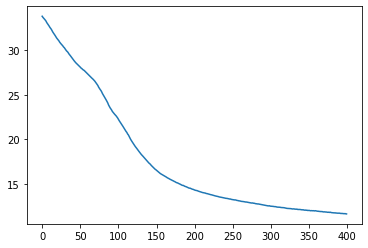

400 11.607675
401 11.601902
402 11.590599
403 11.601022
404 11.608404
405 11.581734
406 11.595563
407 11.556449
408 11.545827
409 11.547997
410 11.538929
411 11.52651
412 11.550026
413 11.527624
414 11.518131
415 11.5106125
416 11.504411
417 11.490971
418 11.476153
419 11.476525
420 11.479054
421 11.474306
422 11.489029
423 11.452123
424 11.445646
425 11.43749
426 11.44081
427 11.435495
428 11.422921
429 11.4127445
430 11.422845
431 11.401067
432 11.402299
433 11.400273
434 11.386765
435 11.378332
436 11.368434
437 11.357114
438 11.361512
439 11.346023
440 11.336546
441 11.329065
442 11.3286085
443 11.320192
444 11.3352165
445 11.3246565
446 11.324916
447 11.317567
448 11.290127
449 11.283486
450 11.287945
451 11.270985
452 11.265569
453 11.265856
454 11.252495
455 11.237998
456 11.230095
457 11.235513
458 11.234586
459 11.219747
460 11.228937
461 11.222238
462 11.207277
463 11.205368
464 11.188308
465 11.19368
466 11.196438
467 11.175439
468 11.189466
469 11.191
470 11.171638
471 11.1

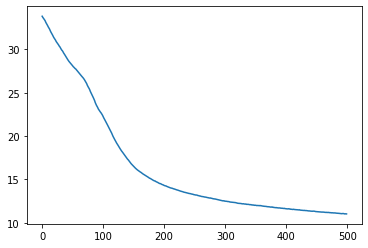

500 10.993014
501 10.998936
502 11.011805
503 10.981512
504 10.989408
505 11.017646
506 11.000513
507 10.986977
508 10.977921
509 10.979841
510 10.9809675
511 10.963764
512 10.970684
513 10.954504
514 10.940648
515 10.943267
516 10.976469
517 10.941667
518 10.94879
519 10.93461
520 10.921516
521 10.917697
522 10.912406
523 10.897005
524 10.902465
525 10.892073
526 10.903627
527 10.875571
528 10.877872
529 10.867673
530 10.866781
531 10.892904
532 10.875859
533 10.896384
534 10.852049
535 10.843102
536 10.8285475
537 10.828552
538 10.811449
539 10.823791
540 10.821942
541 10.795359
542 10.792893
543 10.793929
544 10.807758
545 10.810004
546 10.780117
547 10.7724905
548 10.784153
549 10.757334
550 10.752969
551 10.752742
552 10.749325
553 10.745477
554 10.730999
555 10.734118
556 10.718773
557 10.717417
558 10.730465
559 10.7324
560 10.716496
561 10.74309
562 10.710532
563 10.686925
564 10.693708
565 10.686975
566 10.710603
567 10.672517
568 10.6859045
569 10.658979
570 10.654642
571 10.

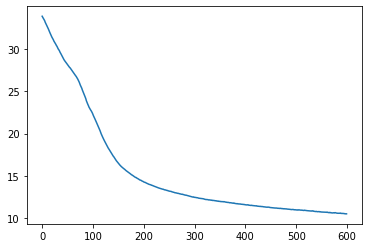

600 10.5640955
601 10.518701
602 10.512389
603 10.504146
604 10.5003805
605 10.512288
606 10.553042
607 10.513198
608 10.4984455
609 10.512445
610 10.5017605
611 10.504216
612 10.482352
613 10.479612
614 10.488477
615 10.505601
616 10.459775
617 10.444685
618 10.446565
619 10.457889
620 10.478173
621 10.443169
622 10.449028
623 10.452398
624 10.430162
625 10.42846
626 10.430977
627 10.422232
628 10.402178
629 10.399915
630 10.391913
631 10.397656
632 10.417117
633 10.413127
634 10.401526
635 10.389429
636 10.38699
637 10.3748
638 10.367454
639 10.367785
640 10.384886
641 10.373456
642 10.40869
643 10.368707
644 10.372923
645 10.351255
646 10.341704
647 10.343348
648 10.338632
649 10.344954
650 10.34297
651 10.347954
652 10.343156
653 10.336275
654 10.33427
655 10.315744
656 10.304334
657 10.299648
658 10.311729
659 10.295883
660 10.319983
661 10.29751
662 10.314867
663 10.300961
664 10.288981
665 10.310091
666 10.300481
667 10.291323
668 10.298887
669 10.266012
670 10.277312
671 10.286

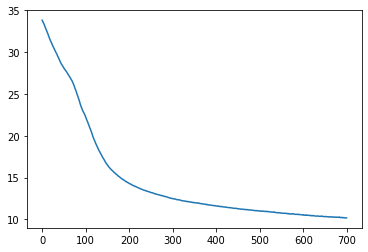

700 10.177556
701 10.1846075
702 10.160273
703 10.164187
704 10.171494
705 10.163729
706 10.174561
707 10.145629
708 10.144013
709 10.145008
710 10.132313
711 10.154162
712 10.159805
713 10.1641035
714 10.144619
715 10.159552
716 10.118998
717 10.123361
718 10.131501
719 10.123164
720 10.113909
721 10.132755
722 10.121486
723 10.108334
724 10.110865
725 10.12554
726 10.101915
727 10.0982
728 10.0998335
729 10.093611
730 10.107684
731 10.09595
732 10.116129
733 10.084873
734 10.086679
735 10.08188
736 10.082417
737 10.087165
738 10.064408
739 10.09415
740 10.063491
741 10.098219
742 10.078156
743 10.070212
744 10.055249
745 10.049381
746 10.044817
747 10.058731
748 10.079994
749 10.060437
750 10.034705
751 10.037531
752 10.050298
753 10.052649
754 10.041422
755 10.040173
756 10.049327
757 10.033177
758 10.052196
759 10.030334
760 10.01481
761 10.013687
762 10.016313
763 10.010129
764 10.013798
765 10.000184
766 9.988556
767 9.999171
768 10.008467
769 10.020351
770 10.00114
771 9.999089


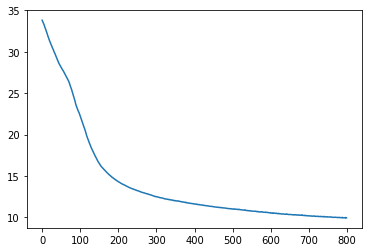

800 9.943519
801 9.926398
802 9.928758
803 9.923575
804 9.9274845
805 9.914398
806 9.913523
807 9.924517
808 9.946598
809 9.90691
810 9.910923
811 9.934228
812 9.90511
813 9.906248
814 9.91536
815 9.925875
816 9.925886
817 9.901586
818 9.904188
819 9.904999
820 9.923041
821 9.900025
822 9.929098
823 9.9338045
824 9.909493
825 9.934949
826 9.93733
827 9.89104
828 9.881295
829 9.876279
830 9.875252
831 9.9113655
832 9.919317
833 9.881956
834 9.877299
835 9.870448
836 9.8671
837 9.886467
838 9.8807335
839 9.92092
840 9.887788
841 9.899115
842 9.892892
843 9.866573
844 9.869324
845 9.891564
846 9.888222
847 9.854885
848 9.85005
849 9.850102
850 9.856357
851 9.853227
852 9.883773
853 9.850321
854 9.855596
855 9.83981
856 9.838683
857 9.852026
858 9.862873
859 9.842527
860 9.849213
861 9.8524
862 9.842849
863 9.877361
864 9.838989
865 9.842174
866 9.843086
867 9.831949
868 9.872002
869 9.853636
870 9.861806
871 9.851741
872 9.859702
873 9.885279
874 9.85356
875 9.8202915
876 9.812412
877 9.8

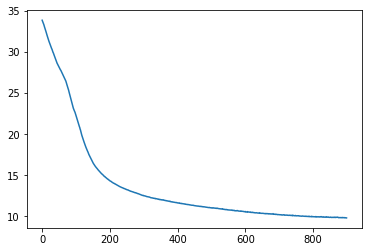

900 9.788714
901 9.80183
902 9.809476
903 9.830164
904 9.803641
905 9.77479
906 9.776162
907 9.775024
908 9.787836
909 9.785259
910 9.781665
911 9.773601
912 9.760467
913 9.759135
914 9.775175
915 9.790077
916 9.783802
917 9.751534
918 9.753067
919 9.760018
920 9.770752
921 9.772086
922 9.767699
923 9.743105
924 9.740157
925 9.738206
926 9.731443
927 9.737208
928 9.7337
929 9.739931
930 9.740362
931 9.744504
932 9.73416
933 9.725511
934 9.718227
935 9.718815
936 9.726793
937 9.724834
938 9.733392
939 9.736965
940 9.733766
941 9.723695
942 9.711591
943 9.712213
944 9.736384
945 9.755306
946 9.722799
947 9.71645
948 9.718658
949 9.69609
950 9.695129
951 9.714501
952 9.719478
953 9.697854
954 9.6930895
955 9.709481
956 9.691539
957 9.700129
958 9.695434
959 9.69179
960 9.706694
961 9.71439
962 9.710787
963 9.688716
964 9.686877
965 9.682021
966 9.681891
967 9.678479
968 9.68626
969 9.673493
970 9.670652
971 9.674005
972 9.69123
973 9.669354
974 9.683436
975 9.672544
976 9.689514
977 9.666

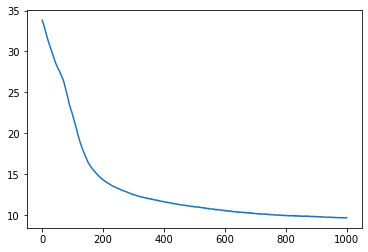

In [11]:
lr = 0.1
losses = []
eps = np.finfo(float).eps

for epoch in range(1000):
    with tf.GradientTape() as tape:
        pred_y = tf.nn.softmax(X@W + b)
        loss = tf.reduce_sum(-y*tf.math.log(pred_y+eps))/len(y) # epsilon
    
    grads = tape.gradient(loss, [W,b])
    W.assign_sub(lr*grads[0])
    b.assign_sub(lr*grads[1])
    
    losses.append(loss.numpy())
    print(epoch, loss.numpy())
    
    if (epoch+1)%100==0:
        plt.figure()
        plt.plot(losses)
        plt.show()

In [12]:
pred_y2 = tf.nn.sigmoid(X@W + b)

(pred_y2.numpy().argmax(axis=1) == y_train).mean()

0.24835